# 자연어처리

In [1]:
import pandas as pd
path = './data/'
path2='C:/Users/COM/Desktop/'

In [2]:
keyword = '반지하'

In [3]:
뉴스크롤링 = pd.read_csv(path + f'{keyword} 웹크롤링.csv', encoding='cp949')

In [4]:
# 뉴스크롤링
# sns.countplot(data=뉴스크롤링.title)

In [5]:
import pandas as pd
import nltk
from konlpy.tag import Komoran
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
komoran = Komoran()
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

C:\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [6]:
뉴스크롤링 = pd.read_csv(path + f'{keyword} 웹크롤링.csv', encoding='cp949')
뉴스크롤링
n_lst=[]
for i in range(len(뉴스크롤링)):
    n_lst.append(뉴스크롤링.title[i])

In [10]:
newstring=''
for i in range(len(n_lst)):
    newstring += n_lst[i]
newstring

' 2016 신춘문예  슬픈 온대   김갑용 데스크시각  성장의 달콤함 1988 침체의 고단함 2015  신수건 유리로 덮은 서울 건축물은 불통의 상징 초록우산어린이재단  생계 도우려다 중태 고교생 돕기 캠페인창원시의원 소유 상가주택 공사 인건비 미지급 논란오케피 뮤지컬 무대 아래 황당 발랄 유쾌한 이야기준비 안된 부모들 짓밟히는 아이들프로야구 응답하라 1988남양유업 밀어내기  갑질 에 손도끼 챙겨 맞선 남자서울시  연극인 위한 공동체 주택  배우의 집  오픈연극인만을 위한  배우의 집  생긴다서울시  연극인을 위한 공동체주택  배우의 집  10가구 공급서울시  연극인 전용  배우의 집  공급 대학로에 연극인 위한 임대주택 들어선다  고성 북한 포격 도발 시 주민 보호고성군  동해안 최북단 명파리 주민대피시설 준공 기자수첩  불법건축  사실상 용인하는 정부동두천 밝은사회국제클럽ㆍ천사운동본부  취약계층 주거환경개선 김현주의 일상 톡톡  배고픈 것보다 배아파하는 게 더 문제 국내 조선족 80만명  이방인 아닌 이방인 송주희 기자의 About Stage  무대와 객석 사이 오케스트라  또 다른 뮤지컬  라이브 스타  경향마당   청년주거  이제 정부가 응답하라  헬조선  분노 게이지  측정불가 아시안체어샷   탑밴드3  최종 우승KBS 탑밴드3 최종우승아시안체어샷 탑밴드 사상 최초의 심사위원 점수 100점 만점 나와  탑밴드3  최종우승은  조선록  아시안체어샷  최초로 심사위원 점수 100점 나와노동개혁 입법 논의 재점화 연내 처리되나10년 동안 끌어온 논란  사업비 문제로 또 충돌 경제와 세상  골목공동체의 소중함 노동개혁 불씨 되살려라  與  여론전 통해  野 압박 전방위 총력 설득 또 설득   불씨를 살려라  與  노동개혁 여론전 野 압박 전방위 총력 삶과 문화  이웃이라는 판타지 저심도    지하   도철2호선  용어 정립부터시신 무게 20㎏  잿빛 청춘    자살 아사하는  절망 30代 어르신 학생  소통의 클레이 점토작품전 1차 회의 이어 2차 회의도

In [8]:
noun_lst=[]
nouns = komoran.nouns(newstring)
for i in nouns:
    if len(i)>1:
        noun_lst.append(i)

In [9]:
adj_lst=[]
for i in komoran.pos(newstring):
    if (i[1]=='VA')&(len(i)>1):
        adj_lst.append(i[0])

In [16]:
nounadj = noun_lst + adj_lst
nounadj_lst=[]
for i in nounadj:
    if len(i)>1:
        nounadj_lst.append(i)

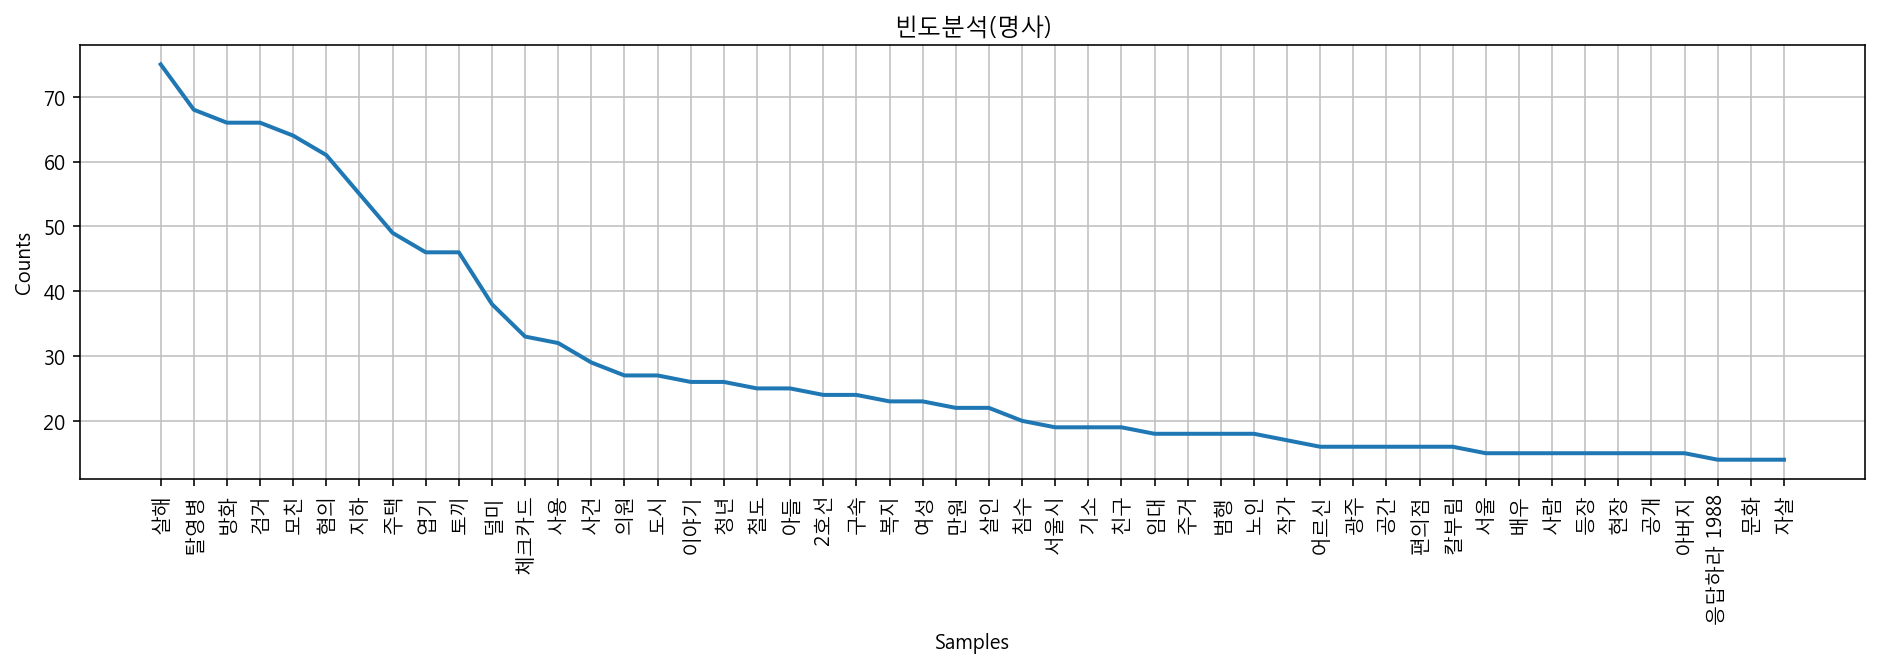

<Figure size 432x288 with 0 Axes>

In [38]:
#명사 빈도분석그래프
tokens = noun_lst
vocab = nltk.Text(tokens)
plt.figure(figsize=(16,4))
plt.title('빈도분석(명사)')
vocab.plot(50)
plt.savefig(path2+'빈도분석(명사).png',transparent=True)

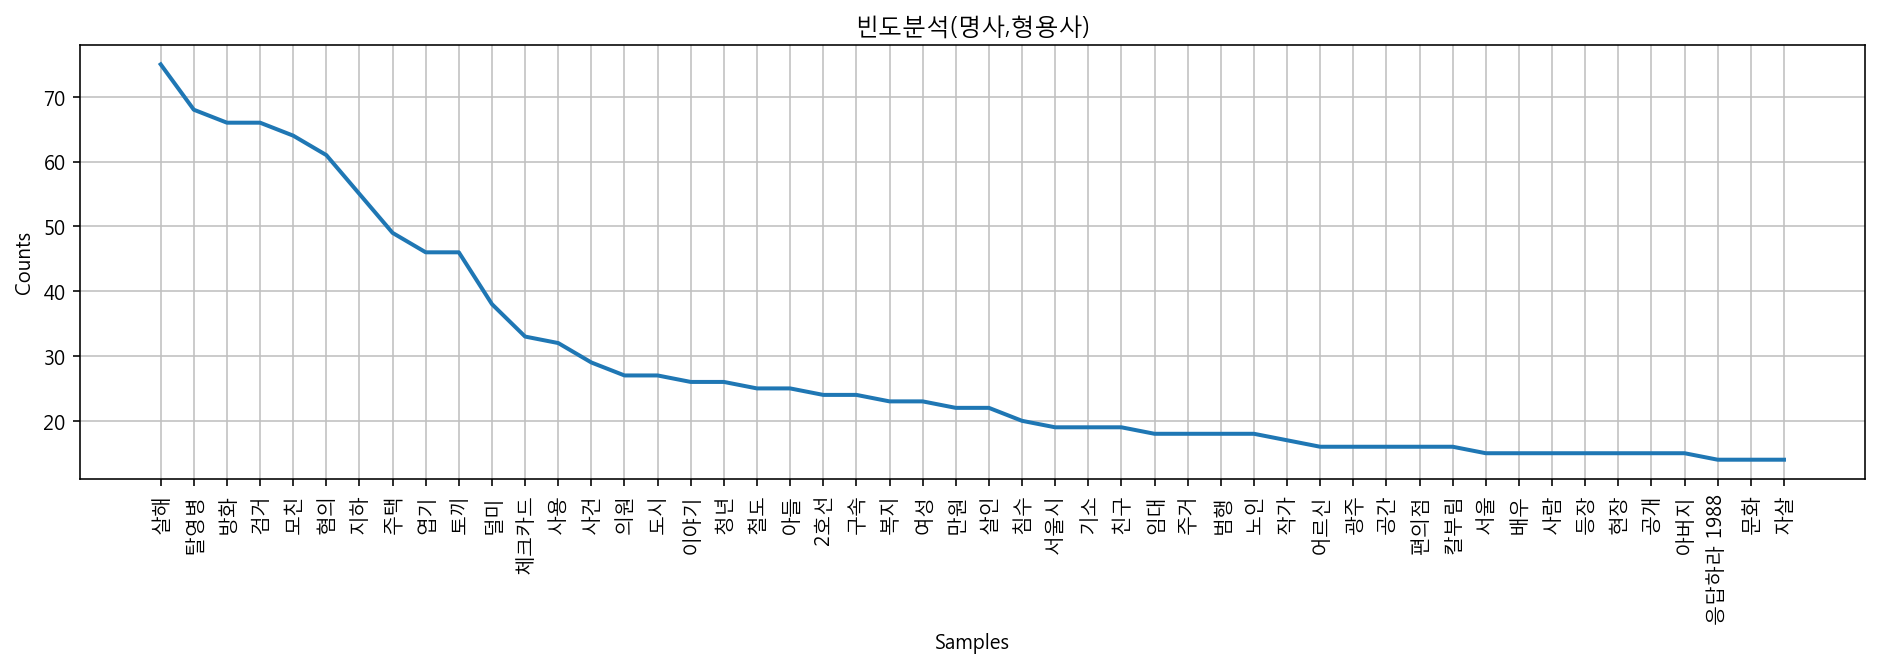

<Figure size 432x288 with 0 Axes>

In [39]:
#명사형용사 빈도분석그래프
tokens = nounadj_lst
vocab = nltk.Text(tokens)
plt.figure(figsize=(16,4))
plt.title('빈도분석(명사,형용사)')
vocab.plot(50)
plt.savefig(path2+'빈도분석(명사,형용사).png',transparent=False)

# 워드클라우드

In [29]:
불용어 = set(['불용어 설정'])

In [30]:
#하나의 문자열로 만든다.
text_noun = ' '.join(noun_lst)
text_nounadj = ' '.join(nounadj_lst)

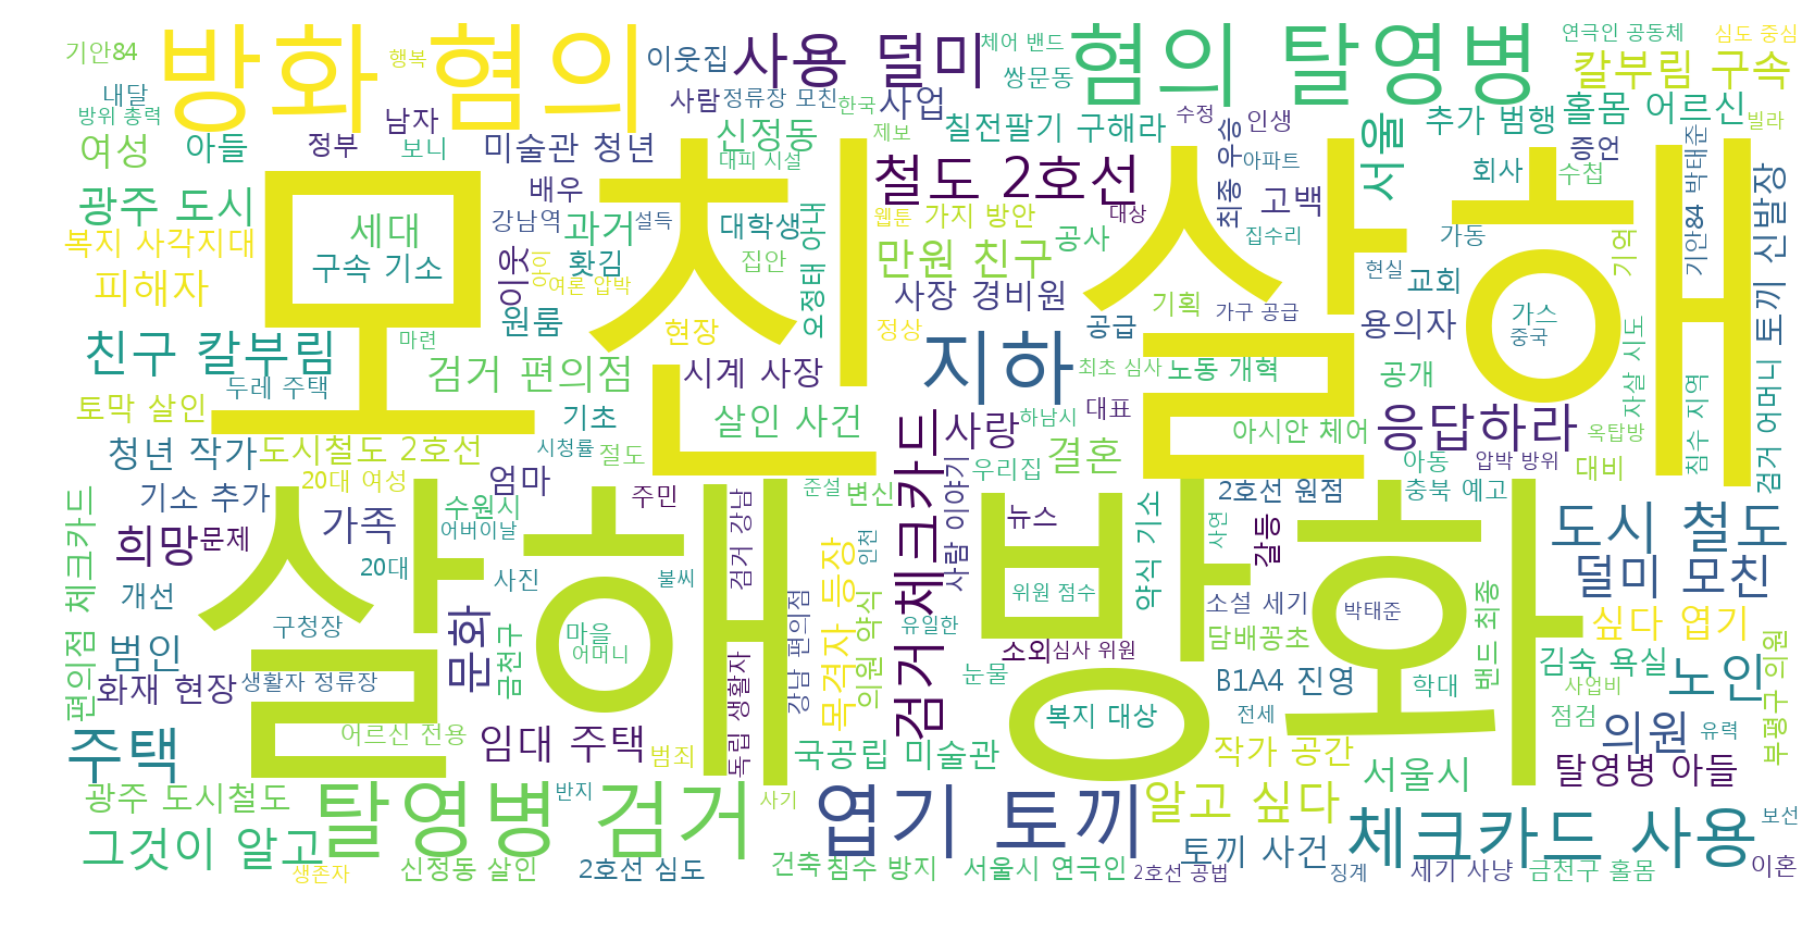

In [31]:
#워드클라우드(명사)
wordc = WordCloud(background_color='white',font_path='C:/Windows/Fonts/malgun.ttf', 
                  relative_scaling=0.5, stopwords=불용어,
                  width=1600, height=800)
wordc.generate(text_noun)
plt.figure(figsize=(16,8))
plt.imshow(wordc, interpolation = 'bilinear')
plt.axis('off')
plt.savefig(path2+'워드클라우드(명사).png',transparent=False)

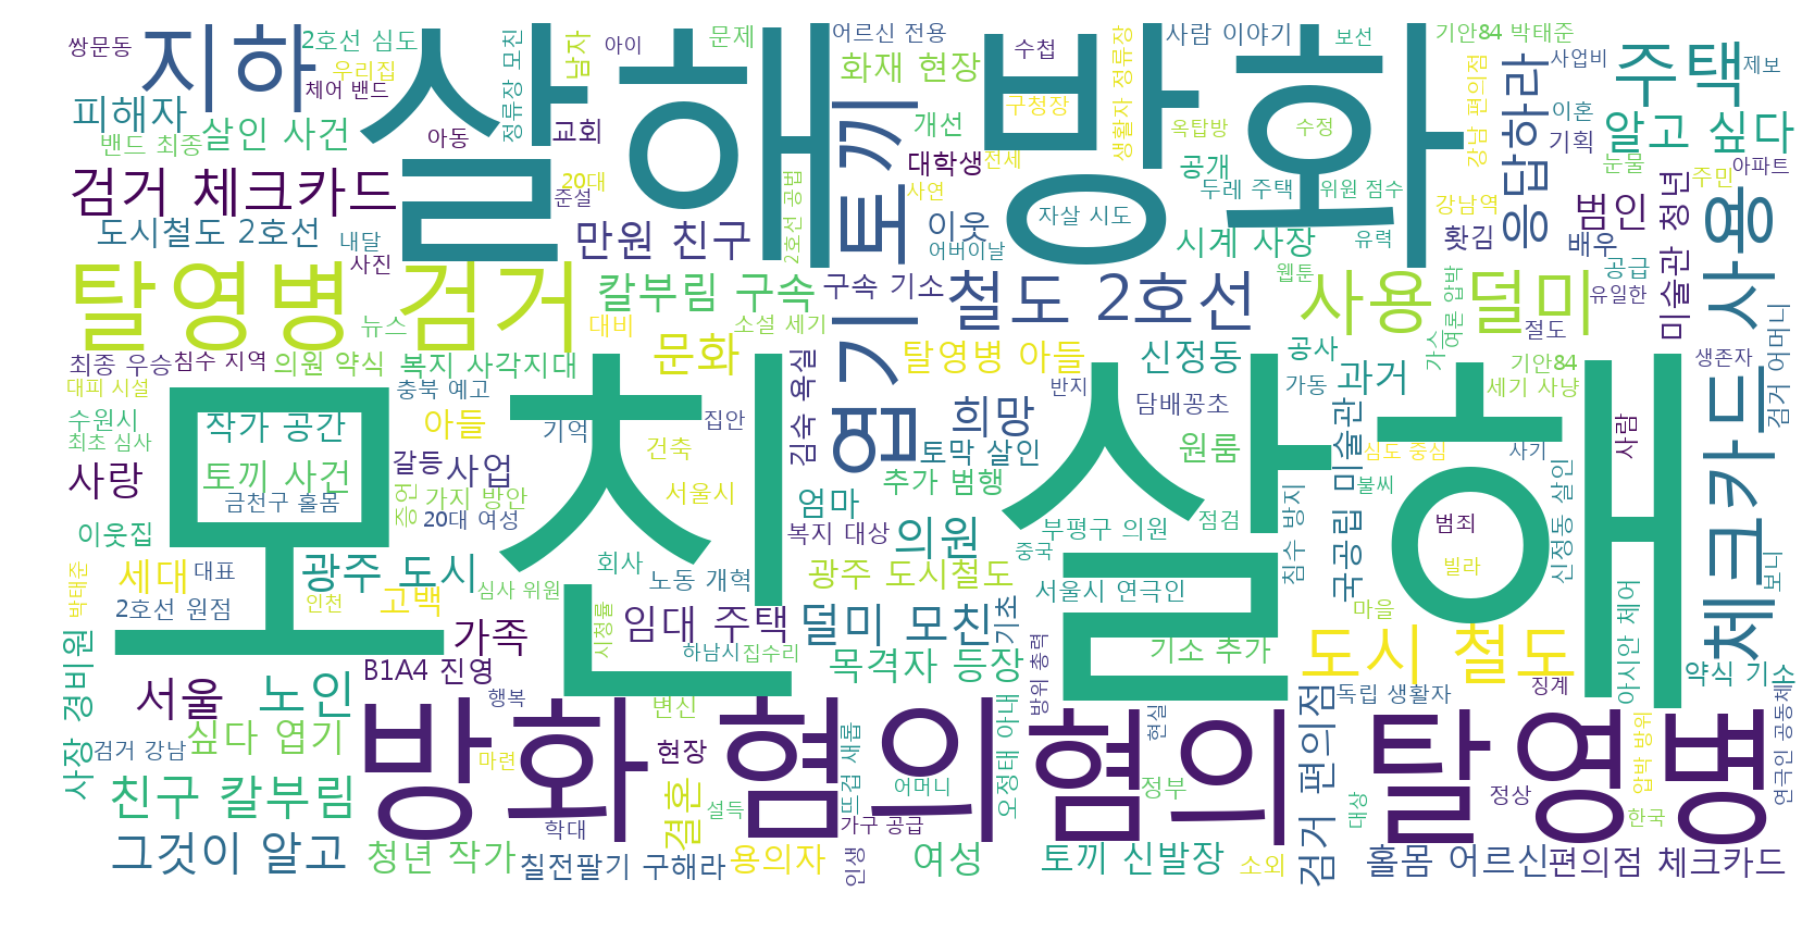

In [32]:
#워드클라우드(명사,형용사)
wordc = WordCloud(background_color='white',font_path='C:/Windows/Fonts/malgun.ttf', 
                  relative_scaling=0.5, stopwords=불용어,
                  width=1600, height=800)
wordc.generate(text_nounadj)
plt.figure(figsize=(16,8))
plt.imshow(wordc, interpolation = 'bilinear')
plt.axis('off')
plt.savefig(path2+'워드클라우드(명사,형용사).png',transparent=False)